In [ ]:
/ix/hosmanbeyoglu/kor11/CytAssist/Tonsil

In [215]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
from anndata.utils import logger as ad_logger
import warnings
warnings.filterwarnings('ignore')
ad_logger.disabled = True

In [ ]:
def load_tissue(tissue, dtype):
    adata = sc.read_visium(path='/ix/hosmanbeyoglu/kor11/CytAssist/Brain/GEX', count_file='CytAssist_11mm_FFPE_Human_Glioblastoma_filtered_feature_bc_matrix.h5') 

In [216]:
# adata = sc.read_visium(path='/ix/hosmanbeyoglu/kor11/CytAssist/Tonsil', count_file='CytAssist_FFPE_Protein_Expression_Human_Tonsil_filtered_feature_bc_matrix.h5')

adata = sc.read_visium(path='/ix/hosmanbeyoglu/kor11/CytAssist/Brain/GEX', count_file='CytAssist_11mm_FFPE_Human_Glioblastoma_filtered_feature_bc_matrix.h5')

In [201]:
adata.var_names_make_unique()

In [202]:
adata

AnnData object with n_obs × n_vars = 10878 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [203]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
adata

AnnData object with n_obs × n_vars = 10878 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'log1p', 'pca', 'neighbors', 'leiden'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [211]:
adata.obsm['spatial'] = adata.obsm['spatial'].astype(float)

In [209]:
import matplotlib.pyplot as plt

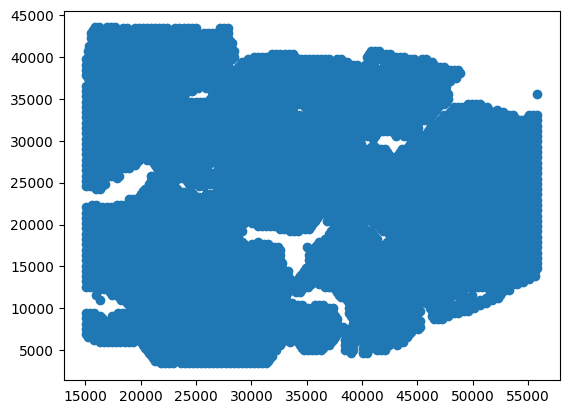

In [210]:
plt.scatter(adata.obsm['spatial'].astype(float)[:, 0], adata.obsm['spatial'].astype(float)[:, 1])

In [212]:
sc.tl.leiden(adata, resolution=0.3)

In [213]:
adata.uns.pop('leiden_colors')

['#023fa5',
 '#7d87b9',
 '#bec1d4',
 '#d6bcc0',
 '#bb7784',
 '#8e063b',
 '#4a6fe3',
 '#8595e1',
 '#b5bbe3',
 '#e6afb9',
 '#e07b91',
 '#d33f6a',
 '#11c638',
 '#8dd593',
 '#c6dec7',
 '#ead3c6',
 '#f0b98d',
 '#ef9708',
 '#0fcfc0',
 '#9cded6',
 '#d5eae7',
 '#f3e1eb',
 '#f6c4e1',
 '#f79cd4']

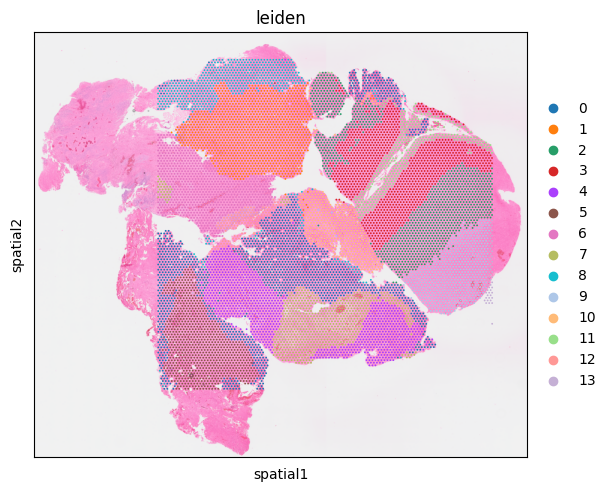

In [214]:
sq.pl.spatial_scatter(adata, color='leiden')